In [4]:
#allow output from every Line
from IPython.core. interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt


In [5]:
def streaks_and_slumps(numbers):
    #create open lists
    streaks = []
    slumps = []
    
    #we'll take the first in the list, and assign it to current number, ans start the count at 1
    current_count = 1
    current_number = numbers[0]

    for number in numbers[1:]:
        #if the next number is the same as current number, increase count by 1
        if number == current_number:
            current_count += 1
        else:
            #assign it to wither streaks or slumps depending on if it was a 0 or 1
            if current_number == 1:
                streaks.append(current_count)
            else:
                slumps.append(current_count)
            #reset count to 1 and set the streak breaking number to the new current number    
            current_count = 1
            current_number = number

    if current_number == 1:
        streaks.append(current_count)
    else:
        slumps.append(current_count)

    return streaks, slumps

In [6]:
#I grabbed game by game data from https://www.baseball-reference.com/players/d/dimagjo01.shtml (game logs)
dimaggio = pd.read_csv("dimaggio.csv")

In [7]:
dimaggio['AB'].mean()
sum(dimaggio['AB'] < 3) / len(dimaggio['AB'])
sum(dimaggio['AB'] > 4) / len(dimaggio['AB'])

3.929147465437788

0.059907834101382486

0.24539170506912442

In [8]:
g_hit_p = sum(dimaggio['H'] != 0) / len(dimaggio['H'])
g_hit_p

0.7799539170506913

In [8]:
#how many simulations of DiMaggio's career do you want to do?
dimaggio_sims = 10000

In [9]:
dataY = pd.DataFrame(columns=['sim', 'long'])

for i in range(1, dimaggio_sims+1):
    dataY.loc[i - 1, 'sim'] = i
    dataY.loc[i - 1, 'long'] =max(streaks_and_slumps(random.choices([0, 1], weights=[1 - g_hit_p, g_hit_p], k=1736))[0])


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          7.,  17.,  88., 193., 374., 557., 702., 867., 887., 929., 881.,
        712., 687., 602., 491., 400., 323., 298., 205., 176., 132., 102.,
         77.,  63.,  55.,  34.,  36.,  23.,  15.,  14.,  12.,   5.,   5.,
          8.,   3.,   6.,   6.,   3.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5,
        14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5,
        25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5,
        36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5,
        47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5,
        58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5,
        69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5

Text(0.5, 0, 'Longest Hit Streak')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Longest DiMaggio Hit Streak From Simulations')

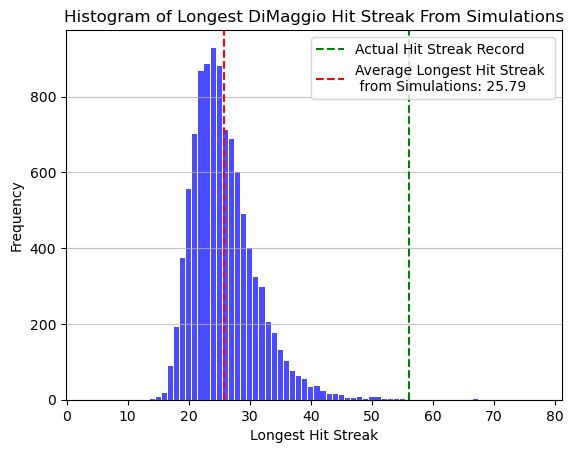

In [10]:
#plot of distribution of DiMaggio hit streaks from sims of Part 2
min_value = int(dataY['long'].min()) - 10.5
max_value = int(dataY['long'].max()) + 10.5

plt.hist(dataY['long'], bins=np.arange(min_value, max_value + 1, 1), color='blue', alpha=0.7, rwidth=0.85)

plt.xlabel('Longest Hit Streak')
plt.ylabel('Frequency')
plt.title('Histogram of Longest DiMaggio Hit Streak From Simulations')

plt.axvline(x=56, color='green', linestyle='--', label='Actual Hit Streak Record')

average_hit_streak = dataY['long'].mean()
plt.axvline(x=average_hit_streak, color='red', linestyle='--', label=f'Average Longest Hit Streak \n from Simulations: {average_hit_streak:.2f}') # Added newline (\n) for line break

plt.legend()

plt.grid(axis='y', alpha=0.75)
plt.savefig('dimaggio_sim.png', dpi=300)
plt.show()

In [11]:
dataY['long'].mean()
dataY['long'].median()
dataY['long'].max()
sum(dataY['long'] > 56)
sum(dataY['long'] > 56) / len(dataY['long'])

25.7869

25.0

67

1

0.0001